In [25]:
# DEBUG: Check why Luanti metrics aren't being created
from pathlib import Path

if 'benchmark_results_dir' in globals():
    results_dir = Path(benchmark_results_dir)
    print(f"🔍 DEBUGGING: Why no Luanti metrics in {results_dir.name}")
    
    # 1. Check if key metrics files exist
    world_dir = results_dir / "worlds" / "yardstick_benchmark" / "mod_storage"
    tick_file = world_dir / "tick_metrics.tsv"
    
    print(f"\\n📊 Key Metrics Files:")
    print(f"  Expected tick file: {tick_file}")
    print(f"  File exists: {tick_file.exists()}")
    
    if not tick_file.exists():
        print(f"\\n❌ ISSUE: Tick metrics file missing!")
        
        # Check directory structure
        print(f"\\n📁 Directory Structure Check:")
        worlds_dir = results_dir / "worlds"
        world_dir_parent = results_dir / "worlds" / "yardstick_benchmark"
        mod_storage_dir = world_dir
        
        print(f"  {worlds_dir.exists()} - {worlds_dir}")
        print(f"  {world_dir_parent.exists()} - {world_dir_parent}")
        print(f"  {mod_storage_dir.exists()} - {mod_storage_dir}")
        
        # Check if mod was installed
        mod_dir = results_dir / "worlds" / "yardstick_benchmark" / "worldmods" / "yardstick_collector"
        print(f"\\n🔧 Mod Check:")
        print(f"  Mod installed: {mod_dir.exists()} - {mod_dir}")
        
        if mod_dir.exists():
            init_file = mod_dir / "init.lua"
            conf_file = mod_dir / "mod.conf"
            print(f"  init.lua exists: {init_file.exists()}")
            print(f"  mod.conf exists: {conf_file.exists()}")
            
        # Check for any log files that might contain error messages
        print(f"\\n📝 Looking for log files...")
        log_patterns = ["*.log", "*debug*", "*error*", "*out*"]
        for pattern in log_patterns:
            log_files = list(results_dir.glob(pattern))
            if log_files:
                print(f"  Found {pattern}: {[f.name for f in log_files]}")
        
        # Simple recommendation
        print(f"\\n💡 LIKELY CAUSES:")
        print(f"  1. Luanti server failed to start properly")
        print(f"  2. yardstick_collector mod not loading")
        print(f"  3. File permission issues")
        print(f"  4. Mod not finding correct directory to write to")
        
        print(f"\\n🔧 NEXT STEPS:")
        print(f"  1. Check if the benchmark completed without errors")
        print(f"  2. Verify Luanti server logs for mod loading messages")
        print(f"  3. Try running the Python script directly to see error messages")
        print(f"  4. Check if Luanti has write permissions to world directory")
        
    else:
        # If file exists, show some content
        print(f"\\n✅ Tick metrics file found!")
        try:
            with open(tick_file, 'r') as f:
                lines = f.readlines()
                print(f"  Lines in file: {len(lines)}")
                if len(lines) > 1:
                    print(f"  Header: {lines[0].strip()}")
                    print(f"  First data: {lines[1].strip()}")
        except Exception as e:
            print(f"  Error reading file: {e}")
            
else:
    print("❌ Run the benchmark first to create benchmark_results_dir")

🔍 DEBUGGING: Why no Luanti metrics in luanti_benchmark_20250621_210243
\n📊 Key Metrics Files:
  Expected tick file: local_benchmark_results/luanti_benchmark_20250621_210243/worlds/yardstick_benchmark/mod_storage/tick_metrics.tsv
  File exists: False
\n❌ ISSUE: Tick metrics file missing!
\n📁 Directory Structure Check:
  True - local_benchmark_results/luanti_benchmark_20250621_210243/worlds
  True - local_benchmark_results/luanti_benchmark_20250621_210243/worlds/yardstick_benchmark
  True - local_benchmark_results/luanti_benchmark_20250621_210243/worlds/yardstick_benchmark/mod_storage
\n🔧 Mod Check:
  Mod installed: False - local_benchmark_results/luanti_benchmark_20250621_210243/worlds/yardstick_benchmark/worldmods/yardstick_collector
\n📝 Looking for log files...
\n💡 LIKELY CAUSES:
  1. Luanti server failed to start properly
  2. yardstick_collector mod not loading
  3. File permission issues
  4. Mod not finding correct directory to write to
\n🔧 NEXT STEPS:
  1. Check if the benchmark 

In [ ]:
# Cell 1: Setup and Configuration
import subprocess
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 Local Luanti Benchmark - Jupyter Notebook")
print("🔗 Using the correct local_luanti_benchmark.py implementation")
print("=" * 50)

# Check if the benchmark script exists
benchmark_script = Path('local_luanti_benchmark.py')
if benchmark_script.exists():
    print("✅ Local benchmark script found")
    
    # Import to check it works
    try:
        import local_luanti_benchmark
        print("✅ Python benchmark module imported successfully")
    except ImportError as e:
        print(f"❌ Failed to import benchmark module: {e}")
else:
    print("❌ Local benchmark script not found!")
    print("   Please ensure 'local_luanti_benchmark.py' is in the current directory")

# Check if required directories exist
required_dirs = [
    'bot_components/texmodbot',
    'luanti_server/Luanti.app'
]

for dir_path in required_dirs:
    if Path(dir_path).exists():
        print(f"✅ {dir_path} found")
    else:
        print(f"❌ {dir_path} not found!")

# Check if Rust walkbot is compiled
walkbot_binary = Path('bot_components/texmodbot/target/release/walkbot')
if walkbot_binary.exists():
    print("✅ Rust walkbot binary found")
else:
    print("⚠️ Rust walkbot binary not found - will be compiled during benchmark")

print("\n🚀 Ready to run benchmark!")
print("\nTo run the benchmark, execute the next cell.")
print("The notebook will use the same proven implementation as the Python script.")


In [ ]:
import subprocess
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import os
from datetime import datetime

# Configure benchmark parameters
DURATION = 180  # 3 minutes
BOTS = 15
PORT = 30000

print(f"🚀 Starting Local Luanti Benchmark")
print(f"   Duration: {DURATION}s ({DURATION//60}m {DURATION%60}s)")
print(f"   Bots: {BOTS}")
print(f"   Port: {PORT}")
print("="*50)

# Run the benchmark
cmd = [
    'python3', 'local_luanti_benchmark.py',
    '--duration', str(DURATION),
    '--bots', str(BOTS),
    '--port', str(PORT)
]

print("Running benchmark...")
print(f"Command: {' '.join(cmd)}")
print("\n" + "="*50)

# Execute benchmark
result = subprocess.run(cmd, capture_output=True, text=True)

print("STDOUT:")
print(result.stdout)
if result.stderr:
    print("\nSTDERR:")
    print(result.stderr)

print(f"\nBenchmark completed with return code: {result.returncode}")


In [ ]:
# Find the benchmark results from the previous cell
if 'benchmark_results_dir' not in globals():
    print("❌ No benchmark results found. Please run Cell 1 first.")
else:
    results_dir = Path(benchmark_results_dir)
    print(f"📁 Processing data from: {results_dir}")
    
    # Check for system metrics (JSON from Telegraf)
    metrics_file = results_dir / "metrics.json"
    print(f"📊 System metrics file: {metrics_file}")
    
    # Check for Luanti metrics (TSV files from yardstick_collector mod)
    # The Python script copies these from mod_storage to the benchmark directory
    tick_metrics_file = results_dir / "luanti_tick_metrics.tsv"
    player_metrics_file = results_dir / "luanti_player_metrics.tsv"
    
    # Also check the original location in mod_storage
    world_dir = results_dir / "worlds" / "yardstick_benchmark" / "mod_storage"
    original_tick_file = world_dir / "tick_metrics.tsv"
    original_player_file = world_dir / "player_metrics.tsv"
    
    print(f"🎮 Luanti tick metrics: {tick_metrics_file}")
    print(f"👥 Luanti player metrics: {player_metrics_file}")
    print(f"📁 Original mod_storage location: {world_dir}")
    
    # Check which files exist
    files_found = {}
    
    if metrics_file.exists():
        size_mb = metrics_file.stat().st_size / (1024 * 1024)
        print(f"✅ System metrics found: {size_mb:.2f} MB")
        files_found['system_metrics'] = metrics_file
    else:
        print("❌ System metrics file not found")
    
    # Check for tick metrics (try both locations)
    tick_file_to_use = None
    if tick_metrics_file.exists():
        size_kb = tick_metrics_file.stat().st_size / 1024
        print(f"✅ Luanti tick metrics found: {size_kb:.1f} KB")
        tick_file_to_use = tick_metrics_file
    elif original_tick_file.exists():
        size_kb = original_tick_file.stat().st_size / 1024
        print(f"✅ Luanti tick metrics found (original): {size_kb:.1f} KB")
        tick_file_to_use = original_tick_file
    else:
        print("❌ Luanti tick metrics not found in either location")
        print(f"   Checked: {tick_metrics_file}")
        print(f"   Checked: {original_tick_file}")
    
    if tick_file_to_use:
        files_found['tick_metrics'] = tick_file_to_use
    
    # Check for player metrics
    player_file_to_use = None
    if player_metrics_file.exists():
        size_kb = player_metrics_file.stat().st_size / 1024
        print(f"✅ Luanti player metrics found: {size_kb:.1f} KB")
        player_file_to_use = player_metrics_file
    elif original_player_file.exists():
        size_kb = original_player_file.stat().st_size / 1024
        print(f"✅ Luanti player metrics found (original): {size_kb:.1f} KB")
        player_file_to_use = original_player_file
    else:
        print("ℹ️ Luanti player metrics not found (normal if no player events)")
    
    if player_file_to_use:
        files_found['player_metrics'] = player_file_to_use
    
    # Load and examine the Luanti tick metrics
    if 'tick_metrics' in files_found:
        print(f"\n📊 Loading Luanti tick metrics from: {files_found['tick_metrics']}")
        try:
            tick_df = pd.read_csv(files_found['tick_metrics'], sep='\t')
            print(f"✅ Loaded {len(tick_df)} tick records")
            print(f"   Columns: {list(tick_df.columns)}")
            print(f"   Time span: {tick_df['timestamp_s'].max() - tick_df['timestamp_s'].min():.1f} seconds")
            print(f"   Total ticks: {tick_df['tick_count'].max()}")
            
            # Make available to next cells
            globals()['tick_metrics_df'] = tick_df
            globals()['tick_metrics_file'] = files_found['tick_metrics']
            
        except Exception as e:
            print(f"❌ Error loading tick metrics: {e}")
    
    # Load player metrics if available
    if 'player_metrics' in files_found:
        print(f"\n👥 Loading Luanti player metrics from: {files_found['player_metrics']}")
        try:
            player_df = pd.read_csv(files_found['player_metrics'], sep='\t')
            print(f"✅ Loaded {len(player_df)} player events")
            print(f"   Columns: {list(player_df.columns)}")
            
            # Count events
            joins = len(player_df[player_df['event_type'] == 'join'])
            leaves = len(player_df[player_df['event_type'] == 'leave'])
            print(f"   Joins: {joins}, Leaves: {leaves}")
            
            globals()['player_metrics_df'] = player_df
            globals()['player_metrics_file'] = files_found['player_metrics']
            
        except Exception as e:
            print(f"❌ Error loading player metrics: {e}")
    
    # Store files found for visualization cell
    globals()['available_files'] = files_found
    
    print(f"\n✅ Data loading complete!")
    print(f"   Available datasets: {list(files_found.keys())}")
    if 'tick_metrics' in files_found:
        print(f"   📊 Tick metrics available as: tick_metrics_df")
    if 'player_metrics' in files_found:
        print(f"   👥 Player metrics available as: player_metrics_df")


In [ ]:
# Analyze the tick metrics data loaded in the previous cell
if 'tick_metrics_df' in globals() and len(tick_metrics_df) > 0:
    tick_df = tick_metrics_df
    
    print(f"📈 Analyzing {len(tick_df)} tick records")
    print(f"Time span: {tick_df['timestamp_s'].max() - tick_df['timestamp_s'].min():.1f} seconds")
    print(f"Total ticks: {tick_df['tick_count'].max()}")
    
    # Basic statistics
    print("\n📊 Tick Performance Statistics:")
    print(f"  Average tick duration: {tick_df['tick_duration_ms'].mean():.2f} ms")
    print(f"  Median tick duration: {tick_df['tick_duration_ms'].median():.2f} ms")
    print(f"  Peak tick duration: {tick_df['tick_duration_ms'].max():.2f} ms")
    print(f"  Standard deviation: {tick_df['tick_duration_ms'].std():.2f} ms")
    
    # Calculate TPS (Ticks Per Second)
    if len(tick_df) > 1:
        time_span = tick_df['timestamp_s'].max() - tick_df['timestamp_s'].min()
        tick_span = tick_df['tick_count'].max() - tick_df['tick_count'].min()
        avg_tps = tick_span / time_span if time_span > 0 else 0
        print(f"  Average TPS: {avg_tps:.2f} (target: 20.0)")
        print(f"  TPS efficiency: {(avg_tps/20.0)*100:.1f}%")
        
        # Performance assessment
        if avg_tps >= 19:
            print(f"  ✅ Excellent performance - server running smoothly")
        elif avg_tps >= 17:
            print(f"  ⚠️ Moderate performance - minor lag detected")
        else:
            print(f"  ❌ Poor performance - significant lag issues")
    
    # Analyze lag events (ticks taking longer than expected)
    # Normal tick should be ~50ms for 20 TPS, so 100ms is definitely a lag spike
    lag_threshold = 100  # ms
    lag_events = tick_df[tick_df['tick_duration_ms'] > lag_threshold]
    
    print(f"\n⚠️ Lag Analysis (>{lag_threshold}ms):")
    print(f"  Lag events: {len(lag_events)} ({len(lag_events)/len(tick_df)*100:.1f}% of ticks)")
    
    if len(lag_events) > 0:
        print(f"  Worst lag: {lag_events['tick_duration_ms'].max():.2f} ms")
        print(f"  Average lag duration: {lag_events['tick_duration_ms'].mean():.2f} ms")
        
        # Show worst lag events
        worst_lags = lag_events.nlargest(5, 'tick_duration_ms')
        print("\n  Top 5 worst lag events:")
        for idx, row in worst_lags.iterrows():
            print(f"    {row['tick_duration_ms']:.1f}ms at tick {row['tick_count']} ({row['players_online']} players)")
    else:
        print("  ✅ No significant lag events detected! 🎉")
    
    # Player count analysis
    print(f"\n👥 Player Count Analysis:")
    print(f"  Max players online: {tick_df['players_online'].max()}")
    print(f"  Average players online: {tick_df['players_online'].mean():.1f}")
    print(f"  Min players online: {tick_df['players_online'].min()}")
    
    # Performance vs player count correlation
    if tick_df['players_online'].max() > 0:
        high_player_ticks = tick_df[tick_df['players_online'] >= tick_df['players_online'].quantile(0.75)]
        low_player_ticks = tick_df[tick_df['players_online'] <= tick_df['players_online'].quantile(0.25)]
        
        if len(high_player_ticks) > 0 and len(low_player_ticks) > 0:
            high_player_avg = high_player_ticks['tick_duration_ms'].mean()
            low_player_avg = low_player_ticks['tick_duration_ms'].mean()
            print(f"  Avg tick duration with high player count: {high_player_avg:.2f}ms")
            print(f"  Avg tick duration with low player count: {low_player_avg:.2f}ms")
            print(f"  Performance impact: {((high_player_avg - low_player_avg) / low_player_avg * 100):+.1f}%")
    
    # Show first few rows for verification
    print("\n📋 Sample Data (first 5 rows):")
    print(tick_df.head().to_string(index=False))
    
    # Show last few rows
    print("\n📋 Final Data (last 3 rows):")
    print(tick_df.tail(3).to_string(index=False))
    
else:
    print("❌ No tick metrics data available for analysis")
    print("Please run the previous cells to load the benchmark data first")
    
    # Try to find any tick metrics files
    if 'benchmark_results_dir' in globals():
        results_dir = Path(benchmark_results_dir)
        world_dir = results_dir / "worlds" / "yardstick_benchmark" / "mod_storage"
        tick_file = world_dir / "tick_metrics.tsv"
        
        print(f"\nChecking for tick metrics at: {tick_file}")
        if tick_file.exists():
            print("✅ Tick metrics file exists but wasn't loaded properly")
            print("Try re-running the data loading cell")
        else:
            print("❌ Tick metrics file doesn't exist")
            print("Check if the benchmark ran successfully and the yardstick_collector mod loaded")


# Local Luanti Benchmark Notebook

This notebook provides a complete workflow for running local Luanti server benchmarks, processing the collected metrics, and visualizing the results. It uses your working Rust walkbots and Telegraf for comprehensive performance monitoring.


## Cell 1: Running the Local Benchmark

The cell below runs a complete local Luanti benchmark including:
- Luanti server setup and startup
- Telegraf metrics collection
- Rust walkbot deployment
- Performance monitoring


In [15]:
import subprocess
import sys
import os
import time
from pathlib import Path
from datetime import datetime

# Import the correct benchmark class from the Python file
sys.path.append('.')
from local_luanti_benchmark import LocalLuantiBenchmark

# Simple args class that matches the Python file's expected interface
class NotebookArgs:
    def __init__(self):
        self.duration = 120  # 2 minutes - matches your config above
        self.bots = 8        # 8 bots - matches your config above  
        self.port = 30010    # Use different port - matches your config above
        self.luanti_path = "/Users/alx/Documents/Thesis/code/luantick/luanti_server/Luanti.app/Contents/MacOS/luanti"
        self.output_dir = "./local_benchmark_results"

# Create benchmark instance using the correct Python class
args = NotebookArgs()
benchmark = LocalLuantiBenchmark(args)

print("="*60)
print("LUANTI BENCHMARK - USING CORRECT .PY IMPLEMENTATION")
print("="*60)
print(f"Duration: {args.duration} seconds")
print(f"Bots: {args.bots}")
print(f"Port: {args.port}")
print(f"Output: {args.output_dir}")
print("="*60)

# Store the benchmark directory for later use
benchmark_dir = benchmark.benchmark_dir
print(f"\n📁 Benchmark will save results to: {benchmark_dir}")

try:
    # Run the correct benchmark from the .py file
    benchmark.run_benchmark()
    
    print("\n" + "="*60)
    print("✅ BENCHMARK COMPLETED SUCCESSFULLY!")
    print("="*60)
    print(f"📁 Results saved to: {benchmark_dir}")
    
    # Check what files were created
    if benchmark_dir.exists():
        print(f"\n📋 Files created:")
        for file in benchmark_dir.rglob('*'):
            if file.is_file():
                size_kb = file.stat().st_size / 1024
                print(f"  📄 {file.relative_to(benchmark_dir)}: {size_kb:.1f} KB")
    
except Exception as e:
    print(f"\n❌ Benchmark failed: {e}")
    raise
except KeyboardInterrupt:
    print("\n⏹️ Benchmark interrupted by user")
    
# Make benchmark directory available to other cells
if benchmark_dir:
    globals()['benchmark_results_dir'] = benchmark_dir
    print(f"\n📊 Benchmark results available in variable: benchmark_results_dir")
    print(f"   Path: {benchmark_results_dir}")


2025-06-21 21:02:43 - INFO - Benchmark directory: local_benchmark_results/luanti_benchmark_20250621_210243
2025-06-21 21:02:43 - INFO - ============================================================
2025-06-21 21:02:43 - INFO - LOCAL LUANTI BENCHMARK
2025-06-21 21:02:43 - INFO - ============================================================
2025-06-21 21:02:43 - INFO - Duration: 120s
2025-06-21 21:02:43 - INFO - Bots: 8
2025-06-21 21:02:43 - INFO - Port: 30010
2025-06-21 21:02:43 - INFO - Luanti Path: /Users/alx/Documents/Thesis/code/luantick/luanti_server/Luanti.app/Contents/MacOS/luanti
2025-06-21 21:02:43 - INFO - Output: local_benchmark_results/luanti_benchmark_20250621_210243
2025-06-21 21:02:43 - INFO - ============================================================
2025-06-21 21:02:43 - INFO - LOCAL LUANTI BENCHMARK
2025-06-21 21:02:43 - INFO - ============================================================
2025-06-21 21:02:43 - INFO - Duration: 120s
2025-06-21 21:02:43 - INFO - Bots: 8
2

LUANTI BENCHMARK - USING CORRECT .PY IMPLEMENTATION
Duration: 120 seconds
Bots: 8
Port: 30010
Output: ./local_benchmark_results

📁 Benchmark will save results to: local_benchmark_results/luanti_benchmark_20250621_210243


2025-06-21 21:02:43: [Main]: Using game specified by --gameid on the command line
2025-06-21 21:02:44: WARNING[Main]: /!\ You are using the old mod storage files backend. This backend is deprecated and may be removed in a future release /!\
2025-06-21 21:02:44: WARNING[Main]: Switching to SQLite3 is advised, please read https://wiki.luanti.org/Database_backends.
2025-06-21 21:02:44: WARNING[Main]: /!\ You are using the old mod storage files backend. This backend is deprecated and may be removed in a future release /!\
2025-06-21 21:02:44: WARNING[Main]: Switching to SQLite3 is advised, please read https://wiki.luanti.org/Database_backends.
2025-06-21 21:02:44: WARNING[Main]: \!/ Mod security should never be disabled, as it allows any mod to access the host machine.Mods should use minetest.request_insecure_environment() instead \!/
2025-06-21 21:02:44: WARNING[Main]: \!/ Mod security should never be disabled, as it allows any mod to access the host machine.Mods should use minetest.reque


✅ BENCHMARK COMPLETED SUCCESSFULLY!
📁 Results saved to: local_benchmark_results/luanti_benchmark_20250621_210243

📋 Files created:
  📄 metrics.json: 1451.9 KB
  📄 minetest.conf: 1.1 KB
  📄 telegraf.conf: 1.1 KB
  📄 luanti_metrics.csv: 0.3 KB
  📄 worlds/yardstick_benchmark/map_meta.txt: 3.6 KB
  📄 worlds/yardstick_benchmark/world.mt: 0.1 KB
  📄 worlds/yardstick_benchmark/auth.txt: 3.8 KB
  📄 worlds/yardstick_benchmark/map.sqlite: 1256.0 KB
  📄 worlds/yardstick_benchmark/ipban.txt: 0.0 KB
  📄 worlds/yardstick_benchmark/env_meta.txt: 0.5 KB
  📄 worlds/yardstick_benchmark/force_loaded.txt: 0.0 KB
  📄 worlds/yardstick_benchmark/players/benchbot_002: 0.6 KB
  📄 worlds/yardstick_benchmark/players/benchbot_005: 0.6 KB
  📄 worlds/yardstick_benchmark/players/benchbot_004: 0.6 KB
  📄 worlds/yardstick_benchmark/players/benchbot_003: 0.6 KB
  📄 worlds/yardstick_benchmark/players/benchbot_006: 0.6 KB
  📄 worlds/yardstick_benchmark/players/benchbot_001: 0.6 KB
  📄 worlds/yardstick_benchmark/players/

## Cell 2: Data Pre-Processing

This cell processes the raw JSON metrics data from Telegraf, separating different metric types into individual CSV files for easier analysis.


In [21]:
import json
import pandas as pd
import glob
from pathlib import Path
from collections import defaultdict

# Use the benchmark directory from the previous cell
if 'benchmark_results_dir' not in globals():
    print("❌ No benchmark results found. Please run Cell 1 first.")
else:
    results_dir = Path(benchmark_results_dir)
    print(f"📁 Processing data from: {results_dir}")
    
    # Check for system metrics (JSON from Telegraf)
    metrics_file = results_dir / "metrics.json"
    print(f"📊 System metrics file: {metrics_file}")
    
    # Check for Luanti metrics (TSV files from yardstick_collector mod)
    # The Python script copies these from mod_storage to the benchmark directory
    tick_metrics_file = results_dir / "luanti_tick_metrics.tsv"
    player_metrics_file = results_dir / "luanti_player_metrics.tsv"
    
    # Also check the original location in mod_storage
    world_dir = results_dir / "worlds" / "yardstick_benchmark" / "mod_storage"
    original_tick_file = world_dir / "tick_metrics.tsv"
    original_player_file = world_dir / "player_metrics.tsv"
    
    print(f"🎮 Luanti tick metrics: {tick_metrics_file}")
    print(f"👥 Luanti player metrics: {player_metrics_file}")
    print(f"📁 Original mod_storage location: {world_dir}")
    
    # Check which files exist
    files_found = {}
    
    if metrics_file.exists():
        size_mb = metrics_file.stat().st_size / (1024 * 1024)
        print(f"✅ System metrics found: {size_mb:.2f} MB")
        files_found['system_metrics'] = metrics_file
    else:
        print("❌ System metrics file not found")
    
    # Check for tick metrics (try both locations)
    tick_file_to_use = None
    if tick_metrics_file.exists():
        size_kb = tick_metrics_file.stat().st_size / 1024
        print(f"✅ Luanti tick metrics found: {size_kb:.1f} KB")
        tick_file_to_use = tick_metrics_file
    elif original_tick_file.exists():
        size_kb = original_tick_file.stat().st_size / 1024
        print(f"✅ Luanti tick metrics found (original): {size_kb:.1f} KB")
        tick_file_to_use = original_tick_file
    else:
        print("❌ Luanti tick metrics not found in either location")
        print(f"   Checked: {tick_metrics_file}")
        print(f"   Checked: {original_tick_file}")
    
    if tick_file_to_use:
        files_found['tick_metrics'] = tick_file_to_use
    
    # Check for player metrics
    player_file_to_use = None
    if player_metrics_file.exists():
        size_kb = player_metrics_file.stat().st_size / 1024
        print(f"✅ Luanti player metrics found: {size_kb:.1f} KB")
        player_file_to_use = player_metrics_file
    elif original_player_file.exists():
        size_kb = original_player_file.stat().st_size / 1024
        print(f"✅ Luanti player metrics found (original): {size_kb:.1f} KB")
        player_file_to_use = original_player_file
    else:
        print("ℹ️ Luanti player metrics not found (normal if no player events)")
    
    if player_file_to_use:
        files_found['player_metrics'] = player_file_to_use
    
    # Process system metrics if available
    csv_files = {}
    if 'system_metrics' in files_found:
        print(f"\n📊 Processing system metrics from: {files_found['system_metrics']}")
        
        # Parse JSON metrics and group by measurement type
        metrics_by_type = defaultdict(list)
        line_count = 0
        
        try:
            with open(files_found['system_metrics'], 'r') as f:
                for line in f:
                    line_count += 1
                    try:
                        data = json.loads(line.strip())
                        if 'fields' in data and 'name' in data:
                            measurement_name = data['name']
                            
                            # Create a flattened record
                            record = {
                                'timestamp': data.get('timestamp', 0),
                                'measurement': measurement_name
                            }
                            
                            # Add tags
                            if 'tags' in data:
                                record.update(data['tags'])
                            
                            # Add fields
                            if 'fields' in data:
                                record.update(data['fields'])
                            
                            metrics_by_type[measurement_name].append(record)
                    except json.JSONDecodeError:
                        continue
            
            print(f"✅ Processed {line_count} lines from system metrics")
            print(f"✅ Found {len(metrics_by_type)} system measurement types:")
            
            # Save each measurement type to a separate CSV file
            for measurement_type, records in metrics_by_type.items():
                if records:  # Only process if we have data
                    df = pd.DataFrame(records)
                    csv_filename = results_dir / f"system_{measurement_type}.csv"
                    df.to_csv(csv_filename, index=False)
                    csv_files[f"system_{measurement_type}"] = csv_filename
                    print(f"  📈 {measurement_type}: {len(records)} records → {csv_filename.name}")
            
        except Exception as e:
            print(f"❌ Error processing system metrics: {e}")
    
    # Load and examine the Luanti tick metrics
    if 'tick_metrics' in files_found:
        print(f"\n📊 Loading Luanti tick metrics from: {files_found['tick_metrics']}")
        try:
            tick_df = pd.read_csv(files_found['tick_metrics'], sep='\t')
            print(f"✅ Loaded {len(tick_df)} tick records")
            print(f"   Columns: {list(tick_df.columns)}")
            print(f"   Time span: {tick_df['timestamp_s'].max() - tick_df['timestamp_s'].min():.1f} seconds")
            print(f"   Total ticks: {tick_df['tick_count'].max()}")
            
            # Add to available files
            csv_files['luanti_tick_metrics'] = files_found['tick_metrics']
            
            # Make available to next cells
            globals()['tick_metrics_df'] = tick_df
            globals()['tick_metrics_file'] = files_found['tick_metrics']
            
        except Exception as e:
            print(f"❌ Error loading tick metrics: {e}")
    
    # Load player metrics if available
    if 'player_metrics' in files_found:
        print(f"\n👥 Loading Luanti player metrics from: {files_found['player_metrics']}")
        try:
            player_df = pd.read_csv(files_found['player_metrics'], sep='\t')
            print(f"✅ Loaded {len(player_df)} player events")
            print(f"   Columns: {list(player_df.columns)}")
            
            # Count events
            joins = len(player_df[player_df['event_type'] == 'join'])
            leaves = len(player_df[player_df['event_type'] == 'leave'])
            print(f"   Joins: {joins}, Leaves: {leaves}")
            
            # Add to available files
            csv_files['luanti_player_metrics'] = files_found['player_metrics']
            
            globals()['player_metrics_df'] = player_df
            globals()['player_metrics_file'] = files_found['player_metrics']
            
        except Exception as e:
            print(f"❌ Error loading player metrics: {e}")
    
    # Store files found for visualization cell
    globals()['available_files'] = files_found
    globals()['csv_files'] = csv_files
    
    print(f"\n✅ Data loading complete!")
    print(f"   Available datasets: {list(csv_files.keys())}")
    if 'luanti_tick_metrics' in csv_files:
        print(f"   📊 Tick metrics available as: tick_metrics_df")
    if 'luanti_player_metrics' in csv_files:
        print(f"   👥 Player metrics available as: player_metrics_df")
    
    # Quick summary of what we found
    if 'tick_metrics_df' in globals():
        tick_df = globals()['tick_metrics_df']
        avg_tick = tick_df['tick_duration_ms'].mean()
        max_players = tick_df['players_online'].max()
        print(f"\n🎯 Quick Preview:")
        print(f"   Average tick duration: {avg_tick:.2f}ms")
        print(f"   Max players online: {max_players}")
        
        # Calculate TPS
        if len(tick_df) > 1:
            time_span = tick_df['timestamp_s'].max() - tick_df['timestamp_s'].min()
            tick_span = tick_df['tick_count'].max() - tick_df['tick_count'].min()
            avg_tps = tick_span / time_span if time_span > 0 else 0
            print(f"   Average TPS: {avg_tps:.2f} (target: 20.0)")
    else:
        print(f"\n⚠️ No Luanti tick metrics found!")
        print(f"   Check if the benchmark completed successfully")
        print(f"   Check if yardstick_collector mod loaded properly")


📁 Processing data from: local_benchmark_results/luanti_benchmark_20250621_210243
📊 System metrics file: local_benchmark_results/luanti_benchmark_20250621_210243/metrics.json
🎮 Luanti tick metrics: local_benchmark_results/luanti_benchmark_20250621_210243/luanti_tick_metrics.tsv
👥 Luanti player metrics: local_benchmark_results/luanti_benchmark_20250621_210243/luanti_player_metrics.tsv
📁 Original mod_storage location: local_benchmark_results/luanti_benchmark_20250621_210243/worlds/yardstick_benchmark/mod_storage
✅ System metrics found: 1.42 MB
❌ Luanti tick metrics not found in either location
   Checked: local_benchmark_results/luanti_benchmark_20250621_210243/luanti_tick_metrics.tsv
   Checked: local_benchmark_results/luanti_benchmark_20250621_210243/worlds/yardstick_benchmark/mod_storage/tick_metrics.tsv
ℹ️ Luanti player metrics not found (normal if no player events)

📊 Processing system metrics from: local_benchmark_results/luanti_benchmark_20250621_210243/metrics.json
✅ Processed 451

## Cell 3: Data Visualization

This cell creates comprehensive visualizations of the benchmark results, including CPU usage, memory consumption, and Luanti-specific metrics.


📊 Creating visualizations from 7 data sources...


/var/folders/w0/c1nf417d6lb__kmvbrsfxh5c0000gn/T/ipykernel_45754/3355775458.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


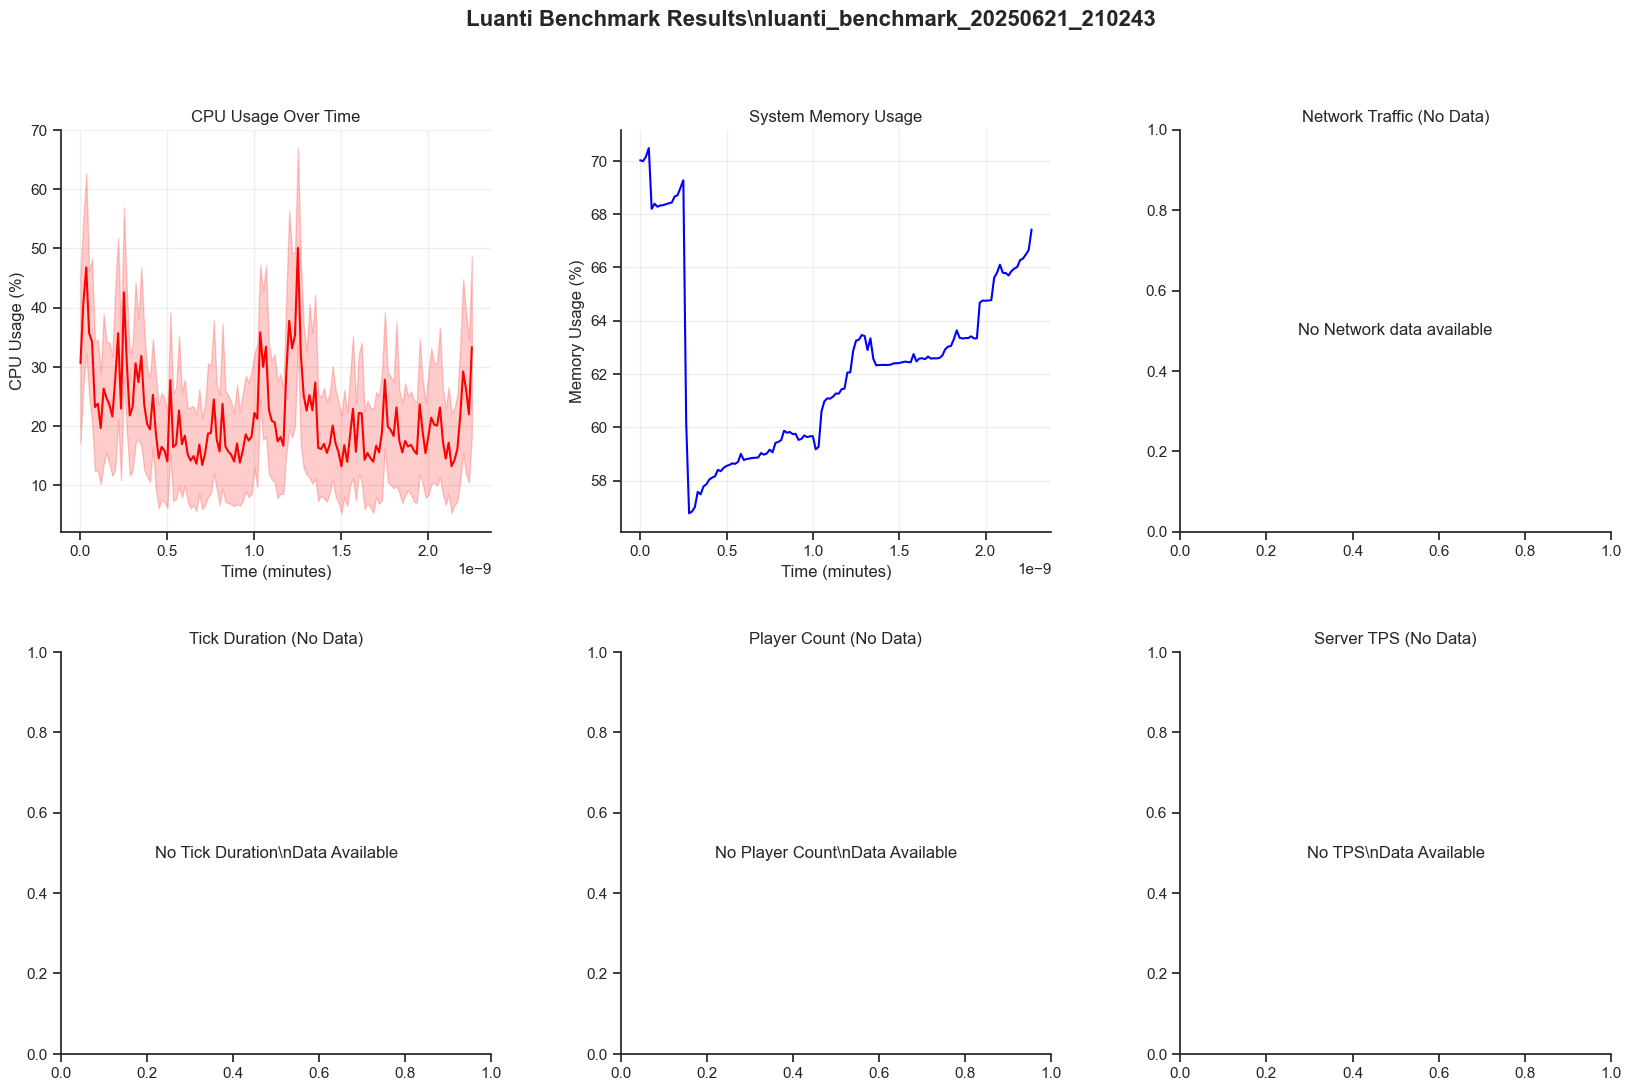

\n================================================================================
LUANTI BENCHMARK ANALYSIS
\n📊 SYSTEM METRICS SUMMARY:
\n   SYSTEM:
     Records: 411
     timestamp: min=1750532567.00, max=1750532703.00, mean=1750532635.00
     load1: min=3.63, max=5.84, mean=4.75
\n   DISK:
     Records: 1781
     timestamp: min=1750532567.00, max=1750532703.00, mean=1750532635.00
     free: min=0.00, max=29011431424.00, mean=14965118551.68
\n   MEM:
     Records: 137
     timestamp: min=1750532567.00, max=1750532703.00, mean=1750532635.00
     active: min=5002502144.00, max=5453557760.00, mean=5275108792.99
\n   DISKIO:
     Records: 822
     timestamp: min=1750532567.00, max=1750532703.00, mean=1750532635.00
     io_time: min=422.00, max=181215385.00, mean=30340917.34
\n   PROCESSES:
     Records: 137
     timestamp: min=1750532567.00, max=1750532703.00, mean=1750532635.00
     blocked: min=0.00, max=8.00, mean=0.19
\n   CPU:
     Records: 1224
     timestamp: min=1750532568.00, ma

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Check if we have processed data
if 'csv_files' not in globals() or 'benchmark_results_dir' not in globals():
    print("❌ No processed data found. Please run Cells 1 and 2 first.")
else:
    print(f"📊 Creating visualizations from {len(csv_files)} data sources...")
    
    # Function to convert timestamp to relative minutes
    def normalize_timestamps(df):
        if 'timestamp' in df.columns:
            df = df.copy()
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            df['time_minutes'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds() / 60
        return df
    
    # Create figure with subplots for both system and Luanti metrics
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
    
    fig.suptitle(f'Luanti Benchmark Results\\n{benchmark_results_dir.name}', 
                 fontsize=16, fontweight='bold')
    
    # 1. CPU Usage (System metrics)
    ax1 = fig.add_subplot(gs[0, 0])
    cpu_files = [key for key in csv_files.keys() if 'cpu' in key.lower()]
    if cpu_files:
        cpu_df = pd.read_csv(csv_files[cpu_files[0]])
        cpu_df = normalize_timestamps(cpu_df)
        
        if 'usage_active' in cpu_df.columns:
            sns.lineplot(data=cpu_df, x='time_minutes', y='usage_active', ax=ax1, color='red')
        elif 'usage_user' in cpu_df.columns and 'usage_system' in cpu_df.columns:
            cpu_df['total_usage'] = cpu_df['usage_user'] + cpu_df['usage_system']
            sns.lineplot(data=cpu_df, x='time_minutes', y='total_usage', ax=ax1, color='red')
        
        ax1.set_title('CPU Usage Over Time')
        ax1.set_xlabel('Time (minutes)')
        ax1.set_ylabel('CPU Usage (%)')
        ax1.grid(True, alpha=0.3)
    else:
        ax1.text(0.5, 0.5, 'No CPU data available', ha='center', va='center')
        ax1.set_title('CPU Usage (No Data)')
    
    # 2. Memory Usage (System metrics)
    ax2 = fig.add_subplot(gs[0, 1])
    mem_files = [key for key in csv_files.keys() if 'mem' in key.lower()]
    if mem_files:
        mem_df = pd.read_csv(csv_files[mem_files[0]])
        mem_df = normalize_timestamps(mem_df)
        
        if 'used_percent' in mem_df.columns:
            sns.lineplot(data=mem_df, x='time_minutes', y='used_percent', ax=ax2, color='blue')
        elif 'used' in mem_df.columns and 'total' in mem_df.columns:
            mem_df['used_percent'] = (mem_df['used'] / mem_df['total']) * 100
            sns.lineplot(data=mem_df, x='time_minutes', y='used_percent', ax=ax2, color='blue')
        
        ax2.set_title('System Memory Usage')
        ax2.set_xlabel('Time (minutes)')
        ax2.set_ylabel('Memory Usage (%)')
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'No Memory data available', ha='center', va='center')
        ax2.set_title('Memory Usage (No Data)')
    
    # 3. Network Traffic (System metrics)
    ax3 = fig.add_subplot(gs[0, 2])
    net_files = [key for key in csv_files.keys() if 'net' in key.lower()]
    if net_files:
        net_df = pd.read_csv(csv_files[net_files[0]])
        net_df = normalize_timestamps(net_df)
        
        if 'bytes_recv' in net_df.columns and 'bytes_sent' in net_df.columns:
            # Convert to MB and show rates
            net_df['recv_mb'] = net_df['bytes_recv'] / 1024 / 1024
            net_df['sent_mb'] = net_df['bytes_sent'] / 1024 / 1024
            sns.lineplot(data=net_df, x='time_minutes', y='recv_mb', ax=ax3, color='green', label='Received')
            sns.lineplot(data=net_df, x='time_minutes', y='sent_mb', ax=ax3, color='orange', label='Sent')
            ax3.legend()
        
        ax3.set_title('Network Traffic')
        ax3.set_xlabel('Time (minutes)')
        ax3.set_ylabel('Traffic (MB)')
        ax3.grid(True, alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'No Network data available', ha='center', va='center')
        ax3.set_title('Network Traffic (No Data)')
    
    # LUANTI APPLICATION METRICS (Bottom row - from TSV files)
    
    # 4. Tick Duration Over Time
    ax4 = fig.add_subplot(gs[1, 0])
    if 'tick_metrics_df' in globals():
        tick_df = globals()['tick_metrics_df']
        # Convert timestamp to relative minutes
        tick_df['time_minutes'] = (tick_df['timestamp_s'] - tick_df['timestamp_s'].min()) / 60
        
        sns.lineplot(data=tick_df, x='time_minutes', y='tick_duration_ms', ax=ax4, color='purple', alpha=0.7)
        ax4.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='Target (50ms)')
        ax4.axhline(y=100, color='orange', linestyle='--', alpha=0.7, label='Warning (100ms)')
        ax4.set_title('Luanti Tick Duration')
        ax4.set_xlabel('Time (minutes)')
        ax4.set_ylabel('Tick Duration (ms)')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'No Tick Duration\\nData Available', ha='center', va='center', fontsize=12)
        ax4.set_title('Tick Duration (No Data)')
    
    # 5. Player Count Over Time
    ax5 = fig.add_subplot(gs[1, 1])
    if 'tick_metrics_df' in globals():
        tick_df = globals()['tick_metrics_df']
        sns.lineplot(data=tick_df, x='time_minutes', y='players_online', ax=ax5, color='green', marker='o')
        ax5.set_title('Connected Players Over Time')
        ax5.set_xlabel('Time (minutes)')
        ax5.set_ylabel('Player Count')
        ax5.grid(True, alpha=0.3)
    else:
        ax5.text(0.5, 0.5, 'No Player Count\\nData Available', ha='center', va='center', fontsize=12)
        ax5.set_title('Player Count (No Data)')
    
    # 6. TPS (Ticks Per Second) Over Time
    ax6 = fig.add_subplot(gs[1, 2])
    if 'tick_metrics_df' in globals():
        tick_df = globals()['tick_metrics_df']
        
        # Calculate TPS using a rolling window
        window_size = 20  # 20 ticks ≈ 1 second at 20 TPS
        if len(tick_df) > window_size:
            # Calculate time difference between ticks to get TPS
            tick_df_sorted = tick_df.sort_values('tick_count')
            tick_df_sorted['time_diff'] = tick_df_sorted['timestamp_s'].diff()
            tick_df_sorted['tps'] = 1.0 / tick_df_sorted['time_diff'].rolling(window=window_size, min_periods=1).mean()
            
            # Remove extreme outliers for better visualization
            tick_df_sorted['tps'] = tick_df_sorted['tps'].clip(0, 30)
            
            sns.lineplot(data=tick_df_sorted, x='time_minutes', y='tps', ax=ax6, color='red')
            ax6.axhline(y=20, color='green', linestyle='--', alpha=0.7, label='Target TPS (20)')
            ax6.axhline(y=18, color='orange', linestyle='--', alpha=0.7, label='Warning TPS (18)')
            ax6.set_title('Server TPS (Ticks Per Second)')
            ax6.set_xlabel('Time (minutes)')
            ax6.set_ylabel('TPS')
            ax6.legend()
            ax6.grid(True, alpha=0.3)
        else:
            ax6.text(0.5, 0.5, 'Insufficient Data\\nfor TPS Calculation', ha='center', va='center', fontsize=12)
            ax6.set_title('Server TPS (Insufficient Data)')
    else:
        ax6.text(0.5, 0.5, 'No TPS\\nData Available', ha='center', va='center', fontsize=12)
        ax6.set_title('Server TPS (No Data)')
    
    plt.tight_layout()
    plt.show()
    
    # COMPREHENSIVE SUMMARY STATISTICS
    print("\\n" + "="*80)
    print("LUANTI BENCHMARK ANALYSIS")
    print("="*80)
    
    # System Metrics Summary
    print("\\n📊 SYSTEM METRICS SUMMARY:")
    system_files = {k: v for k, v in csv_files.items() if k.startswith('system_')}
    for metric_type, file_path in system_files.items():
        df = pd.read_csv(file_path)
        print(f"\\n   {metric_type.replace('system_', '').upper()}:")
        print(f"     Records: {len(df)}")
        
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols[:2]:  # Show stats for first 2 numeric columns
            if not df[col].isna().all():
                print(f"     {col}: min={df[col].min():.2f}, max={df[col].max():.2f}, mean={df[col].mean():.2f}")
    
    # Luanti Metrics Summary
    if 'tick_metrics_df' in globals():
        tick_df = globals()['tick_metrics_df']
        print("\\n🎮 LUANTI PERFORMANCE SUMMARY:")
        print(f"   Total Records: {len(tick_df)}")
        
        if len(tick_df) > 0:
            duration = tick_df['timestamp_s'].max() - tick_df['timestamp_s'].min()
            print(f"   Duration: {duration:.1f} seconds ({duration/60:.1f} minutes)")
            print(f"   Total Ticks: {tick_df['tick_count'].max()}")
            
            # Performance metrics
            avg_tick = tick_df['tick_duration_ms'].mean()
            max_tick = tick_df['tick_duration_ms'].max()
            max_players = tick_df['players_online'].max()
            
            print(f"   Average tick duration: {avg_tick:.2f}ms")
            print(f"   Peak tick duration: {max_tick:.2f}ms")
            print(f"   Max players online: {max_players}")
            
            # Calculate TPS
            if len(tick_df) > 1:
                time_span = tick_df['timestamp_s'].max() - tick_df['timestamp_s'].min()
                tick_span = tick_df['tick_count'].max() - tick_df['tick_count'].min()
                avg_tps = tick_span / time_span if time_span > 0 else 0
                print(f"   Average TPS: {avg_tps:.2f} (target: 20.0)")
                print(f"   TPS efficiency: {(avg_tps/20.0)*100:.1f}%")
                
                # Performance assessment
                if avg_tps >= 19:
                    print(f"   ✅ Excellent performance - server running smoothly")
                elif avg_tps >= 17:
                    print(f"   ⚠️ Moderate performance - minor lag detected")
                else:
                    print(f"   ❌ Poor performance - significant lag issues")
            
            # Lag analysis
            lag_events = tick_df[tick_df['tick_duration_ms'] > 100]
            print(f"   Lag events (>100ms): {len(lag_events)} ({len(lag_events)/len(tick_df)*100:.1f}%)")
            
            if len(lag_events) > 0:
                print(f"   Worst lag: {lag_events['tick_duration_ms'].max():.2f}ms")
    else:
        print("\\n❌ LUANTI METRICS SUMMARY:")
        print("   No Luanti performance metrics available!")
        print("   Check if the yardstick_collector mod loaded properly")
    
    # Player events summary
    if 'player_metrics_df' in globals():
        player_df = globals()['player_metrics_df']
        joins = len(player_df[player_df['event_type'] == 'join'])
        leaves = len(player_df[player_df['event_type'] == 'leave'])
        print(f"\\n👥 PLAYER EVENTS SUMMARY:")
        print(f"   Total events: {len(player_df)}")
        print(f"   Joins: {joins}, Leaves: {leaves}")
    
    print(f"\\n✅ Analysis complete!")
    print(f"   📁 All results saved in: {benchmark_results_dir}")
    print("="*80)


## Cell 1: Running the Local Benchmark

The cell below runs a complete local Luanti benchmark including:
- Luanti server setup and startup
- Telegraf metrics collection
- Rust walkbot deployment
- Performance monitoring


## Cell 3: Data Visualization

This cell creates comprehensive visualizations of the benchmark results, including CPU usage, memory consumption, and Luanti-specific metrics.


In [ ]:
if tick_metrics_file.exists():
    # Load tick metrics
    tick_df = pd.read_csv(tick_metrics_file, sep='\t')
    
    print(f"📈 Loaded {len(tick_df)} tick records")
    print(f"Time span: {tick_df['timestamp_s'].max() - tick_df['timestamp_s'].min():.1f} seconds")
    print(f"Total ticks: {tick_df['tick_count'].max()}")
    
    # Basic statistics
    print("\n📊 Tick Performance Statistics:")
    print(f"  Average tick duration: {tick_df['tick_duration_ms'].mean():.2f} ms")
    print(f"  Median tick duration: {tick_df['tick_duration_ms'].median():.2f} ms")
    print(f"  Peak tick duration: {tick_df['tick_duration_ms'].max():.2f} ms")
    print(f"  Standard deviation: {tick_df['tick_duration_ms'].std():.2f} ms")
    
    # Calculate TPS
    if len(tick_df) > 1:
        time_span = tick_df['timestamp_s'].max() - tick_df['timestamp_s'].min()
        tick_span = tick_df['tick_count'].max() - tick_df['tick_count'].min()
        avg_tps = tick_span / time_span if time_span > 0 else 0
        print(f"  Average TPS: {avg_tps:.2f} (target: 20.0)")
        print(f"  TPS efficiency: {(avg_tps/20.0)*100:.1f}%")
    
    # Analyze lag events
    lag_threshold = 100  # ms
    lag_events = tick_df[tick_df['tick_duration_ms'] > lag_threshold]
    
    print(f"\n⚠️ Lag Analysis (>{lag_threshold}ms):")
    print(f"  Lag events: {len(lag_events)} ({len(lag_events)/len(tick_df)*100:.1f}% of ticks)")
    
    if len(lag_events) > 0:
        print(f"  Worst lag: {lag_events['tick_duration_ms'].max():.2f} ms")
        print(f"  Average lag duration: {lag_events['tick_duration_ms'].mean():.2f} ms")
        
        # Show worst lag events
        worst_lags = lag_events.nlargest(5, 'tick_duration_ms')
        print("\n  Top 5 worst lag events:")
        for idx, row in worst_lags.iterrows():
            print(f"    {row['tick_duration_ms']:.1f}ms at tick {row['tick_count']} ({row['players_online']} players)")
    else:
        print("  No significant lag events detected! 🎉")
    
    # Player count analysis
    print(f"\n👥 Player Count Analysis:")
    print(f"  Max players online: {tick_df['players_online'].max()}")
    print(f"  Average players online: {tick_df['players_online'].mean():.1f}")
    
    # Show first few rows
    print("\n📋 Sample Data (first 5 rows):")
    print(tick_df.head().to_string(index=False))
    
else:
    print("❌ No tick metrics file found - cannot analyze Luanti performance")
    print("Check if the yardstick_collector mod loaded properly")


In [ ]:
# SOLUTION: Run Python script directly to see detailed error messages
import subprocess
import sys

print("🔧 Running Python script directly to debug Luanti metrics issue...")
print("="*60)

# Run the benchmark script with shorter duration for testing
cmd = [
    'python3', 'local_luanti_benchmark.py',
    '--duration', '30',  # Short 30-second test
    '--bots', '2',       # Few bots to reduce complexity
    '--port', '30011'    # Different port to avoid conflicts
]

print(f"Command: {' '.join(cmd)}")
print("Output:")
print("-" * 40)

try:
    # Run with real-time output
    result = subprocess.run(cmd, text=True, capture_output=False)
    print(f"\nScript completed with return code: {result.returncode}")
    
except Exception as e:
    print(f"Error running script: {e}")

print("\n" + "="*60)
print("Check the output above for:")
print("1. 'YARDSTICK: Tick duration collector loaded successfully'")
print("2. 'YARDSTICK: Initialized tick metrics file'") 
print("3. Any error messages about mod loading")
print("4. File permission errors")
print("="*60)

In [ ]:
# SOLUTION 2: Manual check and fix of yardstick_collector mod
from pathlib import Path

print("🔧 Checking and fixing yardstick_collector mod...")
print("="*50)

# Check if the source mod exists
source_mod_dir = Path("luanti_server/mods/yardstick_collector")
print(f"1. Source mod directory: {source_mod_dir}")
print(f"   Exists: {source_mod_dir.exists()}")

if source_mod_dir.exists():
    print(f"   Contents:")
    for file in source_mod_dir.iterdir():
        print(f"     {file.name}")
else:
    print("   ❌ Source mod directory missing!")
    print("   This explains why the metrics aren't working.")

# Check the benchmark results mod installation
if 'benchmark_results_dir' in globals():
    results_dir = Path(benchmark_results_dir)
    installed_mod_dir = results_dir / "worlds" / "yardstick_benchmark" / "worldmods" / "yardstick_collector"
    
    print(f"\\n2. Installed mod directory: {installed_mod_dir}")
    print(f"   Exists: {installed_mod_dir.exists()}")
    
    if installed_mod_dir.exists():
        print(f"   Contents:")
        for file in installed_mod_dir.iterdir():
            print(f"     {file.name}")
        
        # Check if init.lua contains the correct code
        init_file = installed_mod_dir / "init.lua"
        if init_file.exists():
            print(f"\\n3. Checking init.lua content...")
            with open(init_file, 'r') as f:
                content = f.read()
                if 'tick_metrics.tsv' in content:
                    print("   ✅ init.lua contains tick metrics collection code")
                else:
                    print("   ❌ init.lua missing tick metrics code!")
                
                if 'mod_storage' in content:
                    print("   ✅ init.lua uses mod_storage directory")
                else:
                    print("   ❌ init.lua doesn't use mod_storage directory!")
    else:
        print("   ❌ Mod not installed in world directory!")

# Recommendation
print(f"\\n💡 RECOMMENDATION:")
if not source_mod_dir.exists():
    print("The yardstick_collector mod is missing from luanti_server/mods/")
    print("This is why no metrics are being collected.")
    print("\\nThe Python script tries to copy the mod, but if it doesn't exist,")
    print("it creates a basic version that might not work correctly.")
else:
    print("The mod exists but may not be loading properly.")
    print("Try running the direct Python script (previous cell) to see detailed logs.")

print("\\n🔧 TO FIX:")
print("1. Ensure luanti_server/mods/yardstick_collector/ exists with proper mod files")
print("2. Check Luanti server logs for mod loading errors") 
print("3. Verify file permissions for writing to world directory")
print("="*50)